In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

0it [00:00, ?it/s]

100%|█████████▉| 9912320/9912422 [00:26<00:00, 329658.69it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



0it [00:00, ?it/s]


 57%|█████▋    | 16384/28881 [00:00<00:00, 85731.31it/s]
32768it [00:00, 57142.73it/s]                           
0it [00:00, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



 96%|█████████▌| 1581056/1648877 [00:04<00:00, 538269.94it/s]

0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw




  0%|          | 0/4542 [00:00<?, ?it/s]

8192it [00:00, 21656.49it/s]            

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()

    self.fc1 = nn.Linear(28*28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)
  
  def forward(self, x):
    x = F.relu(self.fc1(x)) 
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x, dim=1)
    

net = Net()
print(net)






Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)
# -1 is of any size?

In [0]:
output = net(X)

In [16]:
output

tensor([[-2.2542, -2.3004, -2.2828, -2.3020, -2.3634, -2.3032, -2.2041, -2.2623,
         -2.3158, -2.4584]], grad_fn=<LogSoftmaxBackward>)

In [24]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
# everything that is adjustable (transfer learning), 1e-3

EPOCHS = 3


for epoch in range(EPOCHS):
  for data in trainset:
    # data is a batch of features and labels
    X, y = data
    net.zero_grad()
    # batches also help to generalise
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.1799, grad_fn=<NllLossBackward>)
tensor(0.8174, grad_fn=<NllLossBackward>)
tensor(0.0251, grad_fn=<NllLossBackward>)


In [27]:
correct = 0
total = 0
with torch.no_grad():
  # don't want gradients to be calculated
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct +=1
      total += 1

print(correct)
print(total)
print("Accuracy: ", round(correct/total, 3)) 

58820
60000
Accuracy:  0.98


In [28]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

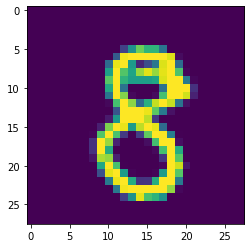

In [30]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28, 28))

In [32]:
print(torch.argmax(net(X[0].view(-1, 784))[0]))

tensor(8)
